# DZ_3

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [4]:
# Проведем разметку по возрастным группам и создадим новый столбец 'age_group', для более удобного анализа по возрасту клиентов

df.loc[df['age'] < 18, 'age_group'] = ['0-17']
df.loc[(df['age'] >= 18) & (df['age'] < 45), 'age_group'] = ['18-44']
df.loc[(df['age'] >= 45) & (df['age'] < 60), 'age_group'] = ['45-59']
df.loc[(df['age'] >= 60) & (df['age'] < 75), 'age_group'] = ['60-74']
df.loc[(df['age'] >= 75) & (df['age'] < 90), 'age_group'] = ['75-89']
df.loc[(df['age'] >= 90) & (df['age'] < 100), 'age_group'] = ['90-100']

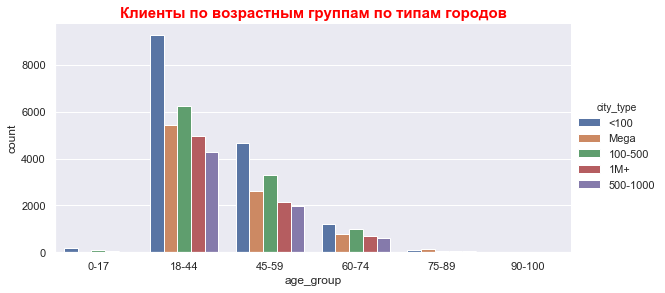

In [5]:
# 1._Построим графики, чтобы посмотреть количество клиентов по возрастным группам 
# к типам городов ('<100', 'Mega', '100-500', '1M+', '500-1000')
sns.set(style='darkgrid')

sns.catplot(
    x='age_group', 
    data=df, 
    kind='count', 
    hue='city_type', 
    hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'], 
    order=['0-17', '18-44', '45-59', '60-74', '75-89', '90-100'],
    height=4, 
    aspect=2); 
plt.title('Клиенты по возрастным группам по типам городов', size=15, color='red', weight='bold');

In [6]:
# По графикам видно, что самое большое количество клиентов в city > 100 и преимущественно в группе 18-44 лет

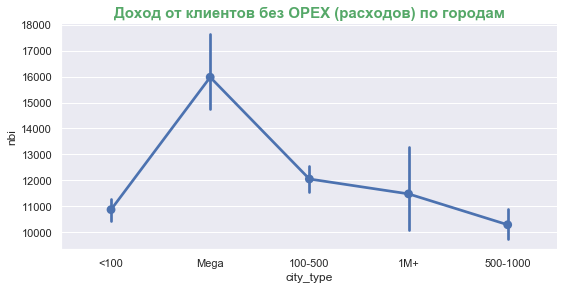

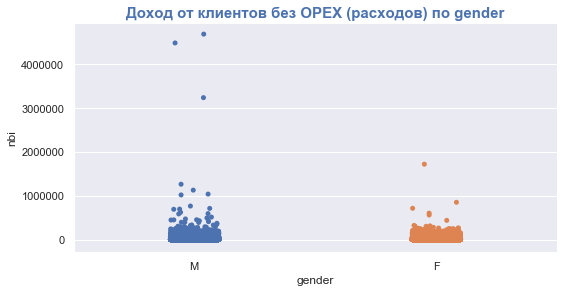

In [7]:
# 2._Проанализируем показатель  'nbi' (доход от клиентов без OPEX_расходов) по городам и gender (M/F)
sns.catplot(
    x='city_type', 
    y='nbi', 
    data=df, 
    kind='point', 
    height=4, 
    aspect=2)

plt.title('Доход от клиентов без OPEX (расходов) по городам',size=15, color='g',weight='bold');
          
sns.catplot(
    x='gender', 
    y='nbi', 
    data=df,
    kind='strip', 
    height=4, 
    aspect=2)

plt.title('Доход от клиентов без OPEX (расходов) по gender',size=15, color='b',weight='bold');

In [8]:
# По графикам можно сделать вывод:
# 1. доход больше всего в категории города - 'Mega'
# 2. доход по gender больше от мужчин, чем от женщин, но не значительно)

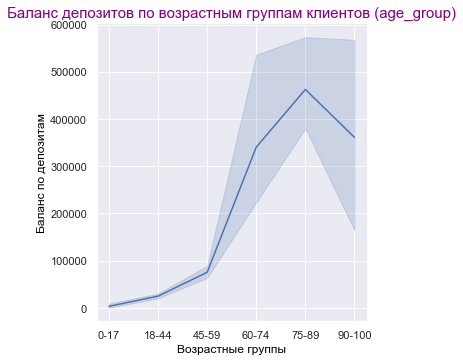

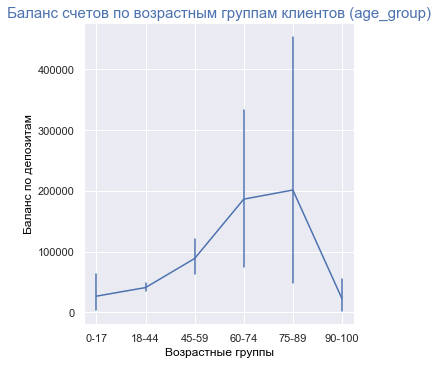

In [9]:
#3._Посмотрим два графика:
# 1. диаграмму балансов по депозитам (td_balance_0m) к возрастным группам клиентов (age_group)
# 2. диаграмму балансов по счетам (casa_balance_0m) к возрастным группам клиентов (age_group)

sns.relplot(
    x='age_group', 
    y='td_balance_0m',  
    data=df,
    kind='line'
)
plt.ylabel("Баланс по депозитам", color='black')
plt.xlabel("Возрастные группы", color='black')
plt.title('Баланс депозитов по возрастным группам клиентов (age_group)', size=15, color='purple');

sns.relplot(
    x='age_group', 
    y='casa_balance_0m',  
    data=df,
    err_style="bars",
    kind='line'
)
plt.ylabel("Баланс по депозитам", color='black')
plt.xlabel("Возрастные группы", color='black')
plt.title('Баланс счетов по возрастным группам клиентов (age_group)', size=15, color='b');

In [10]:
# На графиках видно, что самые большие остатки по депозитам у клиентов группы 75-89 лет.
# а по счетам, с незначительной разницей, с 60 до 89 лет
# И как мы видит, это разные показатели по сумма, на депозитах размещены более крупные денежные средства клиентов
# с которых он получает доход

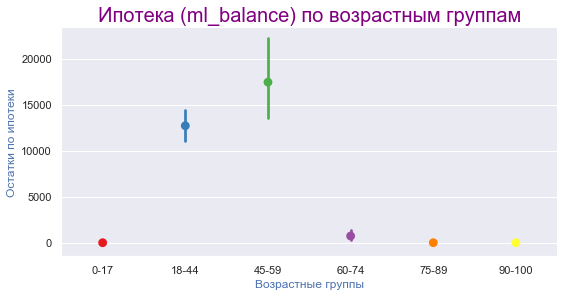

In [11]:
# 4._Посмотрим по возрастным группам клиентов (age_group) у кого есть ипотека (ml_balance) в банке

sns.catplot(
    x='age_group',
    y='ml_balance', 
    data=df, 
    order=['0-17', '18-44', '45-59', '60-74', '75-89', '90-100'],
    palette='Set1', 
    kind='point',
    height=4,
    aspect=2); 
plt.ylabel("Остатки по ипотеки", color='b')
plt.xlabel("Возрастные группы", color='b')
plt.title('Ипотека (ml_balance) по возрастным группам', size=20, color='purple');

In [12]:
# Можно сделать вывод, что ипотека есть у людей с 18-59 лет, с большими остатками  

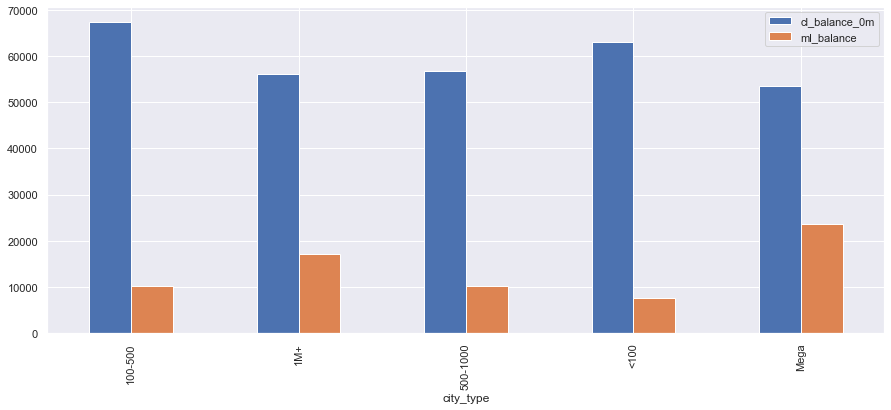

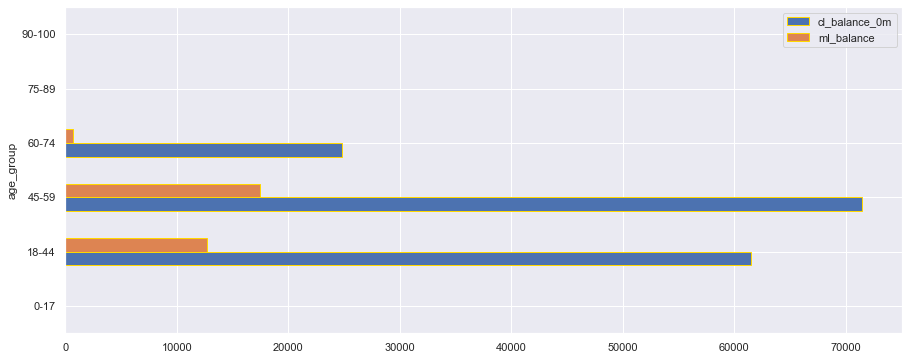

In [16]:
# 5._Можно проанализировать значения наличия потребительских кредитов (cl_balance_0m) и ипотеки (ml_balance) у клиентов:
# 1. по городам (city_type)
# 2. по возрастным группа (age_group)

df.city = df.groupby(['city_type'])[['cl_balance_0m', 'ml_balance']].mean()
df.city.plot(kind='bar', figsize=(15, 6));

df.city = df.groupby(['age_group'])[['cl_balance_0m', 'ml_balance']].mean()
df.city.plot(kind='barh', figsize=(15, 6), edgecolor='gold');

In [17]:
# По первому графику видно, что больше потребительских кретиво в городе city - "100-500", а ипотеки в city - "Mega"
# По второму графику видно, что больше потребительских кретиво и ипотеки у группы клиентов - "45-59", затем "18-44"

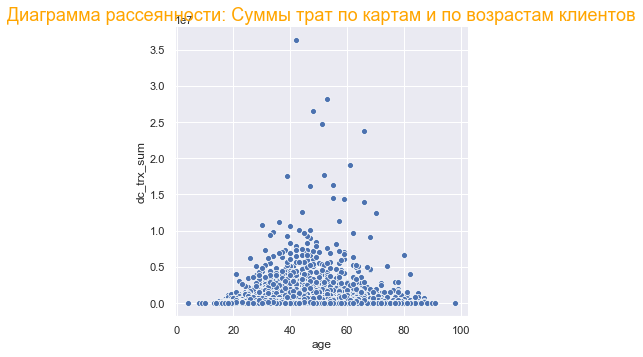

In [18]:
# 6._На графике рассеянности, можно посмотреть соотношение суммы трат по картам к возрасту клиента
sns.relplot(
    x = 'age',
    y = 'dc_trx_sum',
    data=df,
    kind ='scatter'    
)
plt.title('Диаграмма рассеянности: Суммы трат по картам и по возрастам клиентов', size=18, color='orange');

In [19]:
# На графике видно, что более активные траты к сумма у клиентов в возрасте от 30 до 60 лет.
# А по отношению к небольшим сумма, то тратят все категории клиентов до 90 лет.
# Можно сделать вывод, что картами пользуются практически все клиенты банка, причем очень активно  

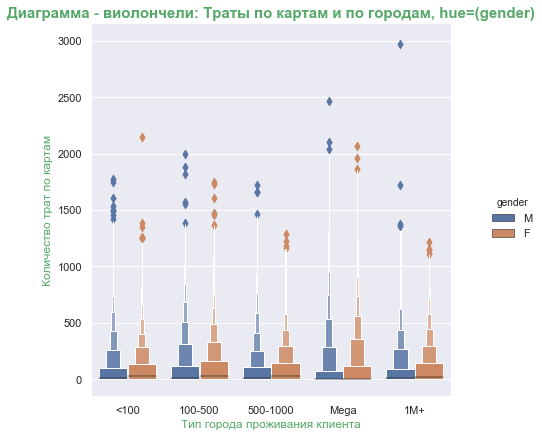

In [20]:
# 7._На диаграмме - виолончели, можно посмотреть распределение и выбросы по значениям из df по графам:
# тип города - 'city_type', количество трат по картам -'dc_trx_cnt', к gender (М/F)

sns.catplot(
    x='city_type',
    y='dc_trx_cnt',
    data=df,
    hue='gender',
    kind='boxen',
    order=['<100', '100-500', '500-1000', 'Mega', '1M+', ],
    height=6,
    aspect=1)

plt.ylabel("Количество трат по картам", color='g')
plt.xlabel("Тип города проживания клиента", color='g')
plt.title('Диаграмма - виолончели: Траты по картам и по городам, hue=(gender)', size=15, color='g', weight='bold');

In [21]:
# Из графика видно, что более активные траты проходят в городе city - 'Mega'
# И часто проводят транзакции мужчины

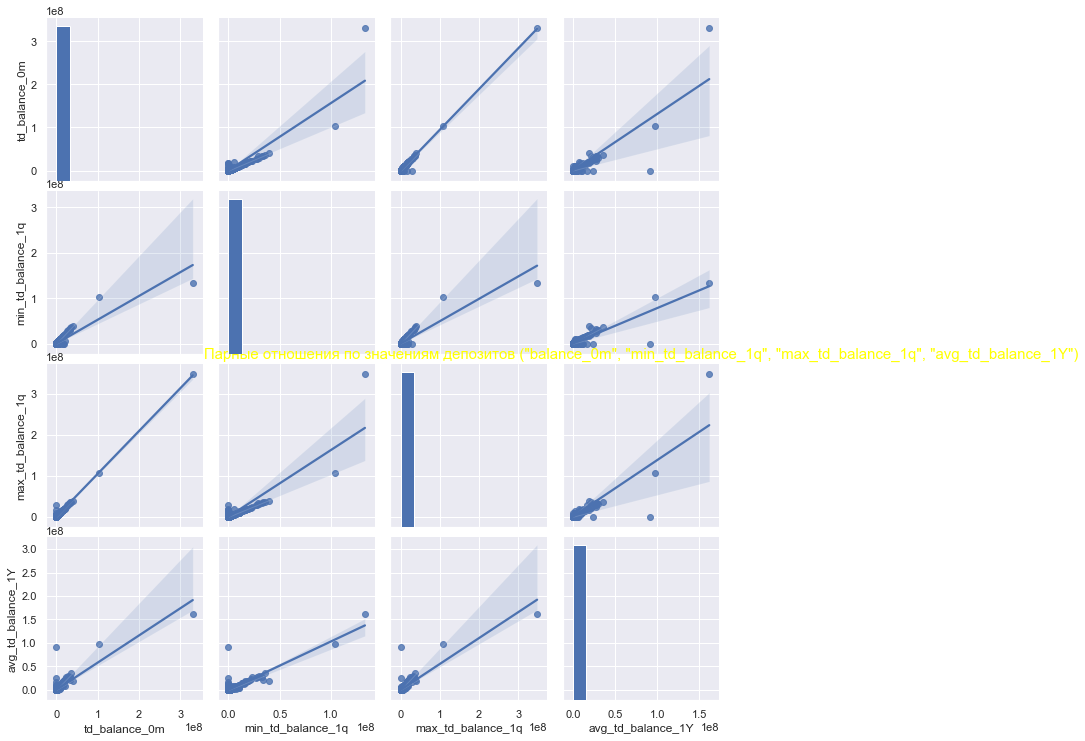

In [23]:
# 8._Построим парные отношения в наборе данных по депозитам
# баланс по депозитам - 'td_balance_0m', 
# минимальный баланс по депозитам за квартал- 'min_td_balance_1q',
# максимальный баланс по депозитам за квартал - 'max_td_balance_1q', 
# средний баланс по депозитам за год - 'avg_td_balance_1Y'

df_items = df.loc[:,['td_balance_0m', 'min_td_balance_1q', 'max_td_balance_1q', 'avg_td_balance_1Y']]
sns.pairplot(
    df_items,
    kind='reg')

plt.title('Парные отношения по значениям депозитов ("balance_0m", "min_td_balance_1q", "max_td_balance_1q", "avg_td_balance_1Y")', size=15, color='yellow'); 

In [ ]:
# провели выборку по колонкам со значениями баланса депозитов по четырем параметрам, из таблицы df
# баланс по депозитам - 'td_balance_0m', 
# минимальный баланс по депозитам за квартал- 'min_td_balance_1q',
# максимальный баланс по депозитам за квартал - 'max_td_balance_1q', 
# средний баланс по депозитам за год - 'avg_td_balance_1Y'